<a href="https://colab.research.google.com/github/shankar1108/python-project/blob/main/salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
df=pd.read_csv('/content/Salary_Data.csv')
df


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
df.shape

(30, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


In [ ]:
len(df)*0.10

3.0

<Axes: >

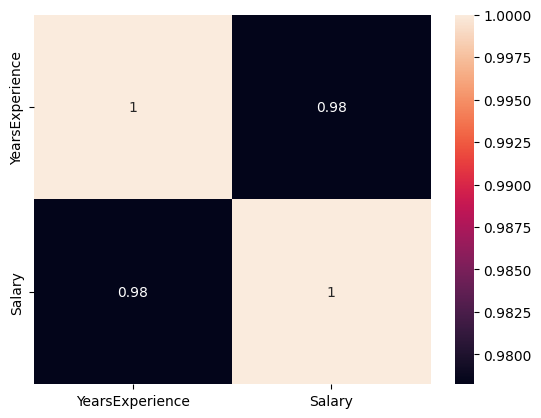

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
for i in df.select_dtypes(include='float64').columns:
  if(df[i].skew()>0.5):
    prinf((i,'skewed'))
    df[i]=df[i].fillna(df[i].median())
  else:
    print((i,'not skewed'))
    df[i]=df[i].fillna(df[i].mean())

('YearsExperience', 'not skewed')
('Salary', 'not skewed')


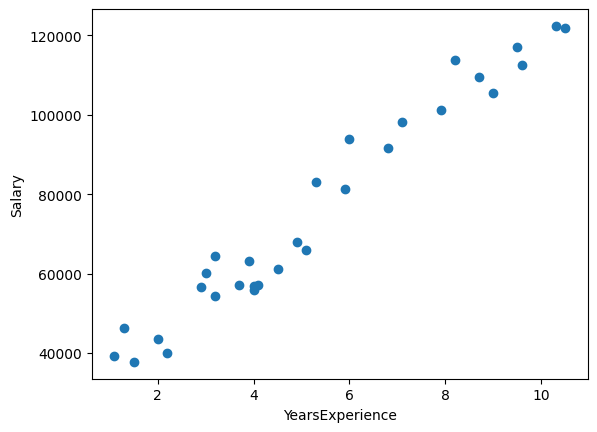

In [ ]:
x=df['YearsExperience'].values
y=df['Salary'].values
plt.scatter(x,y)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

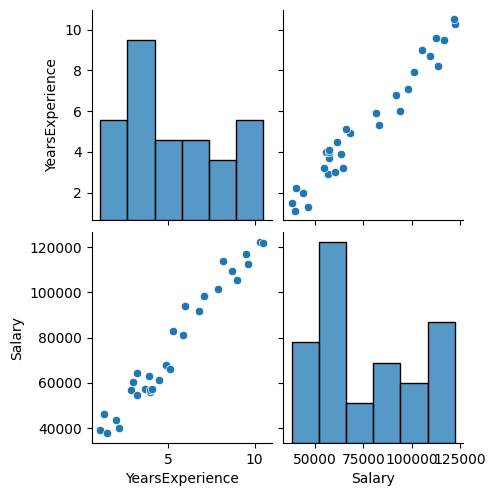

In [ ]:
sns.pairplot(df)

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,1]
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [ ]:
y.head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)
x_train

,YearsExperience
10,3.9
19,6.0
24,8.7
6,3.0
22,7.9
23,8.2
18,5.9
17,5.3
2,1.5
12,4.0


In [ ]:
print(x_test.shape)

(8, 1)


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
rfe=RFE(model)
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
m=model.coef_
b=model.intercept_
m*6.8+b

array([[-2.28786924e+00, -1.91992904e+00, -2.91910824e+00,
        -2.73949745e+00, -2.10498274e+00, -4.55552796e+00,
        -4.55552796e+00, -3.63834034e+00, -5.03388342e+00,
        -4.46185599e+00, -3.81917625e+00, -5.43102319e+00,
        -6.49608768e+00, -5.84354054e+00, -7.57068115e+00,
        -6.60929492e+00, -7.96220437e+00, -9.12635098e+00,
        -1.05523377e+01, -9.62352763e+00, -1.23652797e+01,
        -1.46406008e+01],
       [-3.39248519e+00, -3.02454499e+00, -4.02372419e+00,
        -3.84411340e+00, -3.20959869e+00, -5.66014392e+00,
        -5.66014392e+00, -4.74295629e+00, -6.13849937e+00,
        -5.56647195e+00, -4.92379220e+00, -6.53563914e+00,
        -7.60070363e+00, -6.94815649e+00, -8.67529710e+00,
        -7.71391087e+00, -9.06682032e+00, -1.02309669e+01,
        -1.16569537e+01, -1.07281436e+01, -1.34698957e+01,
        -1.57452168e+01],
       [-6.49952890e-01, -2.82012690e-01, -1.28119189e+00,
        -1.10158110e+00, -4.67066386e-01, -2.91761161e+00,
    

In [ ]:
model.score(x_train,y_train)

0.3181818181818182

In [ ]:
model.score(x_test,y_test)

0.0

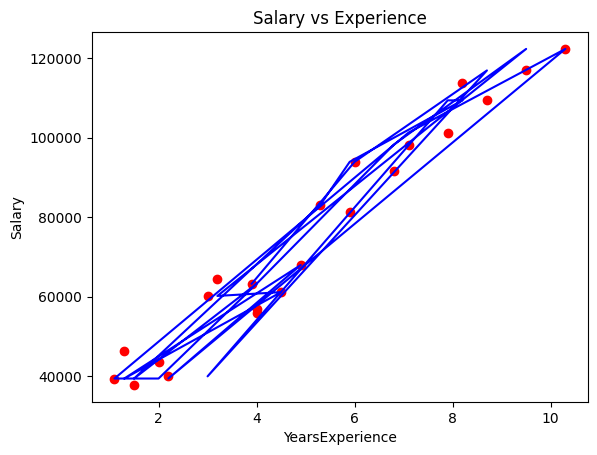

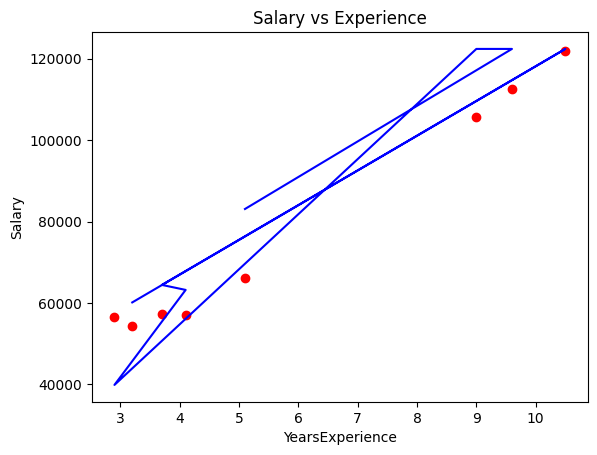

In [ ]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,model.predict(x_train),color='blue')
plt.title('Salary vs Experience')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()


plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,model.predict(x_test),color='blue')
plt.title('Salary vs Experience')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [ ]:
mse=mean_squared_error(y_test,model.predict(x_test))
mse

134057023.75

In [ ]:
ridge_reg =Ridge(alpha=1.0)
ridge_reg.fit(x_train,y_train)

Ridge()

In [ ]:
y_pred=ridge_reg.predict(x_test)
y_pred_test=ridge_reg.predict(x_test)
y_pred_test=ridge_reg.predict(x_test)
y_pred_train=ridge_reg.predict(x_train)

In [ ]:
mse_train=mean_squared_error(x_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)

print("training mse:(mse_train:.2f)")
print("testing mse:(mse_test:.2f)")
print("training r2:(r2_train:.2f)")
print("testing r2:(r2_test:.2f)")

training mse:(mse_train:.2f)
testing mse:(mse_test:.2f)
training r2:(r2_train:.2f)
testing r2:(r2_test:.2f)


In [ ]:
Lasso_reg=Lasso(alpha=0.1)
Lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.1)

In [ ]:
y_train_pred=Lasso_reg.predict(x_train)
y_test_pred=Lasso_reg.predict(x_test)


In [ ]:
mse_train=mean_squared_error(y_train,y_train_pred)
mse_test=mean_squared_error(y_test,y_test_pred)
r2_train=r2_score(y_train,y_train_pred)
r2_test=r2_score(y_test,y_test_pred)

print("training mse:(mse_train:.2f)")
print("testing mse:(mse_test:.2f)")
print("training r2:(r2_train:.2f)")
print("testing r2:(r2_test:.2f)")

training mse:(mse_train:.2f)
testing mse:(mse_test:.2f)
training r2:(r2_train:.2f)
testing r2:(r2_test:.2f)
